<a href="https://colab.research.google.com/github/sikora-toma/gym-pendulum-control/blob/main/pendulum_control_RL_PPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gym

In [2]:
env = gym.make('Pendulum-v1')

In [3]:
env.observation_space

Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)

In [4]:
!pip install pyvirtualdisplay PyOpenGL PyOpenGL-accelerate
!pip install gym[all]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached mujoco-py-1.50.1.68.tar.gz (120 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for mujoco_py
  Running setup.py clean for mujoco_py
Failed to build mujoco_py
  Attempting uninstall: mujoco_py
    Found existing installation: mujoco-py 2.1.2.14
    Uninstalling mujoco-py-2.1.2.14:
      Successfully uninstalled mujoco-py-2.1.2.14
  error: subprocess-exited-with-error
  
  × Running setup.py install for mujoco_py did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from 

In [5]:
!apt-get install python-opengl -y

!apt install xvfb -y

!pip install pyvirtualdisplay

!pip install piglet


from pyvirtualdisplay import Display
Display().start()

from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-2build1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.20.13-1ubuntu1~20.04.8).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from math import atan2
import numpy as np

In [7]:
cos, sin, v = env.reset()

In [8]:
atan2(sin, cos)

1.661344975637906

In [9]:
plt.imshow(env.render('rgb_array'))

NameError: ignored

In [10]:
!pip3 install setuptools==65.5.0
!pip install stable-baselines3[extra]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnNoModelImprovement

import torch as th

In [12]:
# https://stable-baselines3.readthedocs.io/en/master/guide/callbacks.html
eval_env = gym.make('Pendulum-v1')
stop_train_callback = StopTrainingOnNoModelImprovement(max_no_improvement_evals=5, min_evals=5, verbose=1)
eval_callback = EvalCallback(eval_env, eval_freq=1e4, callback_after_eval=stop_train_callback, verbose=1)

# https://stable-baselines3.readthedocs.io/en/master/guide/custom_policy.html
policy_kwargs = dict(activation_fn=th.nn.ReLU,
                     net_arch=[dict(pi=[16, 8], vf=[16, 8])])

# https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html
model = PPO("MlpPolicy", env, verbose=1, use_sde=True, sde_sample_freq=4, learning_rate=0.0003, n_steps=2048, batch_size=64, n_epochs=10, gamma=0.99, policy_kwargs=None)

model.learn(total_timesteps=int(1e5), callback=eval_callback, progress_bar=True)

mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)

#obs = env.reset()
#for i in range(1000):
#    action, _states = model.predict(obs, deterministic=True)
#    obs, rewards, dones, info = env.step(action)
#    env.render()

Output()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.18e+03 |
| time/              |           |
|    fps             | 913       |
|    iterations      | 1         |
|    time_elapsed    | 2         |
|    total_timesteps | 2048      |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | -1.28e+03   |
| time/                   |             |
|    fps                  | 626         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.005780626 |
|    clip_fraction        | 0.0249      |
|    clip_range           | 0.2         |
|    entro

/usr/local/lib/python3.9/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation 
environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and 
rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(

Eval num_timesteps=10000, episode_reward=-1245.09 +/- 265.46

Episode length: 200.00 +/- 0.00

-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 200           |
|    mean_reward          | -1.25e+03     |
| time/                   |               |
|    total_timesteps      | 10000         |
| train/                  |               |
|    approx_kl            | 0.00018254927 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.71         |
|    explained_variance   | 0.0164        |
|    learning_rate        | 0.0003        |
|    loss                 | 3.43e+03      |
|    n_updates            | 40            |
|    policy_gradient_loss | -0.000818     |
|    std                  | 0.995         |
|    value_loss           | 7.18e+03      |
-------------------------------------------


New best mean reward!

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.24e+03 |
| time/              |           |
|    fps             | 360       |
|    iterations      | 5         |
|    time_elapsed    | 28        |
|    total_timesteps | 10240     |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | -1.25e+03    |
| time/                   |              |
|    fps                  | 378          |
|    iterations           | 6            |
|    time_elapsed         | 32           |
|    total_timesteps      | 12288        |
| train/                  |              |
|    approx_kl            | 0.0009918832 |
|    clip_fraction        | 4.88e-05     |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.6         |
|    explained_variance   | 0.00362      |
|    

Eval num_timesteps=20000, episode_reward=-1166.39 +/- 15.86

Episode length: 200.00 +/- 0.00

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 200          |
|    mean_reward          | -1.17e+03    |
| time/                   |              |
|    total_timesteps      | 20000        |
| train/                  |              |
|    approx_kl            | 0.0065019787 |
|    clip_fraction        | 0.0314       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.65        |
|    explained_variance   | 0.000766     |
|    learning_rate        | 0.0003       |
|    loss                 | 3.51e+03     |
|    n_updates            | 90           |
|    policy_gradient_loss | -0.00417     |
|    std                  | 0.975        |
|    value_loss           | 7.42e+03     |
------------------------------------------


New best mean reward!

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.23e+03 |
| time/              |           |
|    fps             | 428       |
|    iterations      | 10        |
|    time_elapsed    | 47        |
|    total_timesteps | 20480     |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | -1.23e+03    |
| time/                   |              |
|    fps                  | 443          |
|    iterations           | 11           |
|    time_elapsed         | 50           |
|    total_timesteps      | 22528        |
| train/                  |              |
|    approx_kl            | 0.0058313985 |
|    clip_fraction        | 0.0334       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.61        |
|    explained_variance   | 0.000556     |
|    

Eval num_timesteps=30000, episode_reward=-1546.93 +/- 69.32

Episode length: 200.00 +/- 0.00

-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 200           |
|    mean_reward          | -1.55e+03     |
| time/                   |               |
|    total_timesteps      | 30000         |
| train/                  |               |
|    approx_kl            | 0.00046501422 |
|    clip_fraction        | 0.00083       |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.64         |
|    explained_variance   | 0.000137      |
|    learning_rate        | 0.0003        |
|    loss                 | 3.43e+03      |
|    n_updates            | 140           |
|    policy_gradient_loss | -0.00111      |
|    std                  | 0.972         |
|    value_loss           | 6.98e+03      |
-------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.22e+03 |
| time/              |  

Eval num_timesteps=40000, episode_reward=-1165.02 +/- 86.32

Episode length: 200.00 +/- 0.00

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 200          |
|    mean_reward          | -1.17e+03    |
| time/                   |              |
|    total_timesteps      | 40000        |
| train/                  |              |
|    approx_kl            | 0.0047786226 |
|    clip_fraction        | 0.0384       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.61        |
|    explained_variance   | 6.15e-05     |
|    learning_rate        | 0.0003       |
|    loss                 | 2.61e+03     |
|    n_updates            | 190          |
|    policy_gradient_loss | -0.00601     |
|    std                  | 0.958        |
|    value_loss           | 5.48e+03     |
------------------------------------------


New best mean reward!

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.19e+03 |
| time/              |           |
|    fps             | 486       |
|    iterations      | 20        |
|    time_elapsed    | 84        |
|    total_timesteps | 40960     |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | -1.2e+03    |
| time/                   |             |
|    fps                  | 492         |
|    iterations           | 21          |
|    time_elapsed         | 87          |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.007966004 |
|    clip_fraction        | 0.069       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.69       |
|    explained_variance   | 5.05e-05    |
|    learning_rate  

Eval num_timesteps=50000, episode_reward=-1272.14 +/- 121.19

Episode length: 200.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 200         |
|    mean_reward          | -1.27e+03   |
| time/                   |             |
|    total_timesteps      | 50000       |
| train/                  |             |
|    approx_kl            | 0.008142992 |
|    clip_fraction        | 0.0687      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.64       |
|    explained_variance   | 3.17e-05    |
|    learning_rate        | 0.0003      |
|    loss                 | 2.08e+03    |
|    n_updates            | 240         |
|    policy_gradient_loss | -0.00882    |
|    std                  | 0.939       |
|    value_loss           | 4.25e+03    |
-----------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.17e+03 |
| time/              |           |
|    fps             | 500 

Eval num_timesteps=60000, episode_reward=-1053.58 +/- 98.95

Episode length: 200.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 200         |
|    mean_reward          | -1.05e+03   |
| time/                   |             |
|    total_timesteps      | 60000       |
| train/                  |             |
|    approx_kl            | 0.015733216 |
|    clip_fraction        | 0.15        |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.68       |
|    explained_variance   | 1.46e-05    |
|    learning_rate        | 0.0003      |
|    loss                 | 1.55e+03    |
|    n_updates            | 290         |
|    policy_gradient_loss | -0.0096     |
|    std                  | 0.913       |
|    value_loss           | 2.91e+03    |
-----------------------------------------


New best mean reward!

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.13e+03 |
| time/              |           |
|    fps             | 507       |
|    iterations      | 30        |
|    time_elapsed    | 121       |
|    total_timesteps | 61440     |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | -1.11e+03   |
| time/                   |             |
|    fps                  | 502         |
|    iterations           | 31          |
|    time_elapsed         | 126         |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.011933746 |
|    clip_fraction        | 0.132       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.71       |
|    explained_variance   | 7.63e-06    |
|    learning_rate  

Eval num_timesteps=70000, episode_reward=-1168.79 +/- 151.54

Episode length: 200.00 +/- 0.00

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 200          |
|    mean_reward          | -1.17e+03    |
| time/                   |              |
|    total_timesteps      | 70000        |
| train/                  |              |
|    approx_kl            | 0.0041318946 |
|    clip_fraction        | 0.0343       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.59        |
|    explained_variance   | 5.42e-06     |
|    learning_rate        | 0.0003       |
|    loss                 | 1.97e+03     |
|    n_updates            | 340          |
|    policy_gradient_loss | -0.00715     |
|    std                  | 0.879        |
|    value_loss           | 3.6e+03      |
------------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.08e+03 |
| time/              |           |
|    fps

Eval num_timesteps=80000, episode_reward=-1052.65 +/- 65.58

Episode length: 200.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 200         |
|    mean_reward          | -1.05e+03   |
| time/                   |             |
|    total_timesteps      | 80000       |
| train/                  |             |
|    approx_kl            | 0.005520301 |
|    clip_fraction        | 0.033       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.59       |
|    explained_variance   | 3.81e-06    |
|    learning_rate        | 0.0003      |
|    loss                 | 768         |
|    n_updates            | 390         |
|    policy_gradient_loss | -0.00624    |
|    std                  | 0.841       |
|    value_loss           | 1.9e+03     |
-----------------------------------------


New best mean reward!

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.06e+03 |
| time/              |           |
|    fps             | 515       |
|    iterations      | 40        |
|    time_elapsed    | 159       |
|    total_timesteps | 81920     |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | -1.05e+03   |
| time/                   |             |
|    fps                  | 518         |
|    iterations           | 41          |
|    time_elapsed         | 161         |
|    total_timesteps      | 83968       |
| train/                  |             |
|    approx_kl            | 0.007423822 |
|    clip_fraction        | 0.087       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.6        |
|    explained_variance   | 3.93e-06    |
|    learning_rate  

Eval num_timesteps=90000, episode_reward=-885.05 +/- 177.76

Episode length: 200.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 200         |
|    mean_reward          | -885        |
| time/                   |             |
|    total_timesteps      | 90000       |
| train/                  |             |
|    approx_kl            | 0.005876044 |
|    clip_fraction        | 0.0708      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.6        |
|    explained_variance   | 2.8e-06     |
|    learning_rate        | 0.0003      |
|    loss                 | 474         |
|    n_updates            | 430         |
|    policy_gradient_loss | -0.00943    |
|    std                  | 0.798       |
|    value_loss           | 1.38e+03    |
-----------------------------------------


New best mean reward!

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.03e+03 |
| time/              |           |
|    fps             | 519       |
|    iterations      | 44        |
|    time_elapsed    | 173       |
|    total_timesteps | 90112     |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | -1.02e+03   |
| time/                   |             |
|    fps                  | 520         |
|    iterations           | 45          |
|    time_elapsed         | 177         |
|    total_timesteps      | 92160       |
| train/                  |             |
|    approx_kl            | 0.006521729 |
|    clip_fraction        | 0.0563      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.56       |
|    explained_variance   | 2.15e-06    |
|    learning_rate  

Eval num_timesteps=100000, episode_reward=-1000.84 +/- 36.42

Episode length: 200.00 +/- 0.00

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 200          |
|    mean_reward          | -1e+03       |
| time/                   |              |
|    total_timesteps      | 100000       |
| train/                  |              |
|    approx_kl            | 0.0061051855 |
|    clip_fraction        | 0.0542       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.54        |
|    explained_variance   | 1.61e-06     |
|    learning_rate        | 0.0003       |
|    loss                 | 389          |
|    n_updates            | 480          |
|    policy_gradient_loss | -0.00532     |
|    std                  | 0.755        |
|    value_loss           | 902          |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -993     |
| time/              |          |
|    fps     

In [13]:
mean_reward, std_reward

(-1006.2157693000001, 168.80750294420668)

In [14]:
model.learn(total_timesteps=int(2e5), progress_bar=True)

Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -918     |
| time/              |          |
|    fps             | 1215     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | -968        |
| time/                   |             |
|    fps                  | 667         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007308782 |
|    clip_fraction        | 0.0709      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.48       |
|    explained_variance   | 1.91e-06    |
|    learning_rate        | 0.

In [15]:
mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)
mean_reward, std_reward

(-155.25751369999998, 107.13061159206379)

In [16]:
model_save = model
model.learn(total_timesteps=int(2e5), progress_bar=True)

Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -221     |
| time/              |          |
|    fps             | 333      |
|    iterations      | 1        |
|    time_elapsed    | 6        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | -200        |
| time/                   |             |
|    fps                  | 332         |
|    iterations           | 2           |
|    time_elapsed         | 12          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.003102954 |
|    clip_fraction        | 0.0512      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.68       |
|    explained_variance   | 0.945       |
|    learning_rate        | 0.

In [17]:
env = gym.make('Pendulum-v1')
obs = env.reset(options={'x_init':np.pi/8, 'y_init':0})
img = plt.imshow(env.render('rgb_array')) # only call this once


torques, angles = [], []
# gym simulates at 20Hz, one step is 0.05s
for _ in range(50):
    img.set_data(env.render('rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = model.predict(obs, deterministic=True)
    angles.append(atan2(obs[1], obs[0]))
    torques.append(action[0])
    obs, _, _, _ = env.step(action)

TypeError: ignored

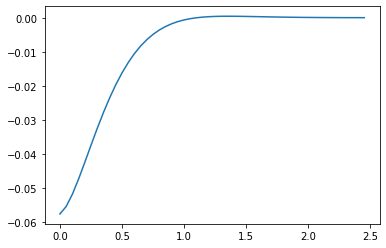

In [ ]:
plt.plot([0.05*i for i in range(len(angles))], angles)

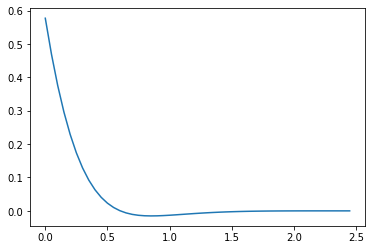

In [ ]:
plt.plot([0.05*i for i in range(len(torques))], torques)

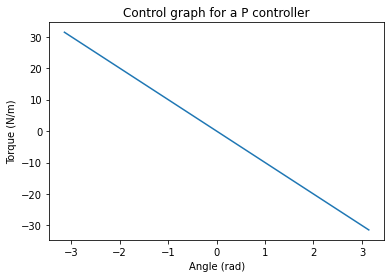

In [ ]:
x = np.linspace(-2, 2, 100)
y = x ** 2


fig, ax = plt.subplots()
ax.plot(np.linspace(-np.pi, np.pi, 100), [get_action(np.cos(i), np.sin(i), 0) for i in np.linspace(-np.pi, np.pi, 100)])
ax.set(xlabel='Angle (rad)', ylabel='Torque (N/m)',
       title='Control graph for a P controller')
plt.show()

[Text(0.5, 0, 'Angle (rad)'),
 Text(0, 0.5, 'Angular velocity (rad/s)'),
 Text(0.5, 1.0, 'Pendulum phase portrait with PID')]

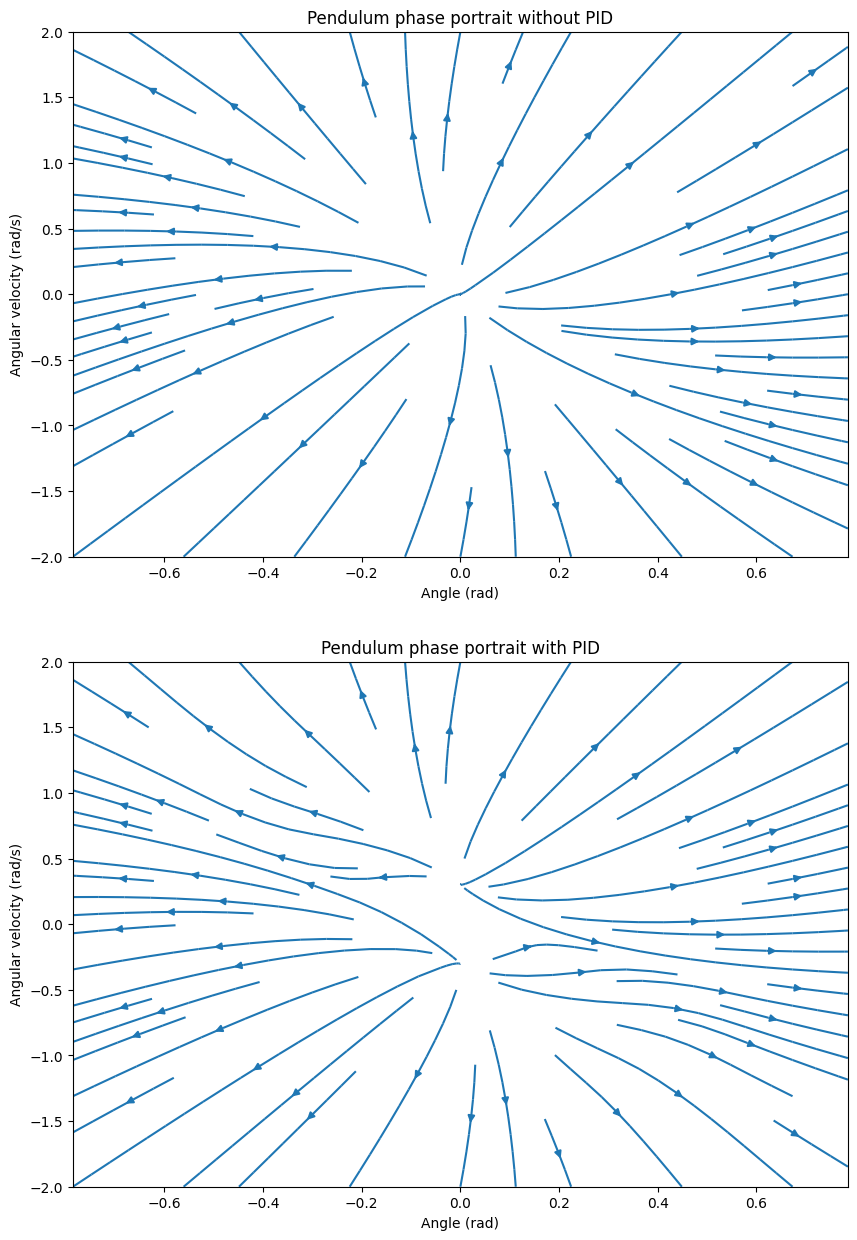

In [29]:
# dynamics equation: newthdot = thdot + (3 * g / (2 * l) * np.sin(th) + 3.0 / (m * l**2) * u) * dt
# controller.get_action(sin(X), cos(X), Y)
THETADOT_MAX, THETA_MAX = np.pi/4, 2
Y, X = np.mgrid[-THETA_MAX:THETA_MAX:100j, -THETADOT_MAX:THETADOT_MAX:100j]

dt = 0.05
g = 10.0
m = 1.0
l = 1.0

#   Without applying any torque
V = Y + (3 * g / (2 * l) * np.sin(X) + 3.0 / (m * l**2) * 0) * dt
U = X + V * dt
#   Using the PID controller (TODO there's a minus missing somewhere to turn the direction)
V_PID = Y + (3 * g / (2 * l) * np.sin(X) + 3.0 / (m * l**2) * np.vectorize(lambda a,b,c: model.predict(np.array([a,b,c]), deterministic=True)[0])(np.cos(X), np.sin(X), Y)) * dt
U_PID = X + V_PID * dt

fig, ax = plt.subplots(2, 1, figsize=(10, 15))

ax[0].streamplot(X, Y, U, V, density=[0.5, 1])
ax[0].set(xlabel='Angle (rad)', ylabel='Angular velocity (rad/s)', title='Pendulum phase portrait without PID')

ax[1].streamplot(X, Y, U_PID, V_PID, density=[0.5, 1])
ax[1].set(xlabel='Angle (rad)', ylabel='Angular velocity (rad/s)', title='Pendulum phase portrait with PID')

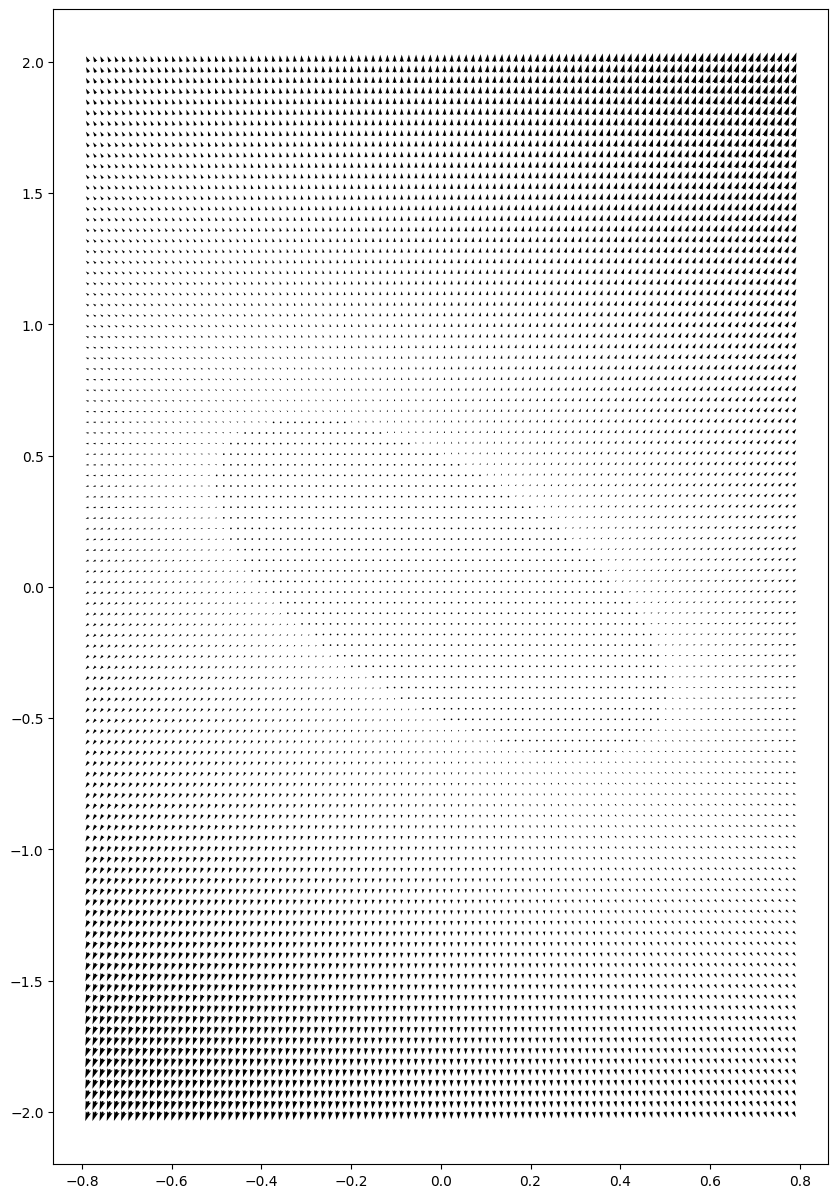

In [30]:
# TODO fix
fig, ax = plt.subplots(figsize=(10,15))
q = ax.quiver(X, Y, U, V)

[ 0.84306246 -0.5378157  -0.58991367]


array([2.], dtype=float32)